In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [8]:
df_sorted = df.sort_values(by="login_time")

In [9]:
df_sorted['count'] = 1

In [11]:
df_sorted.head()

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [21]:
df_sorted = df_sorted.groupby(by="login_time").sum()

In [29]:
df_15 = df_sorted.resample("15T").sum()

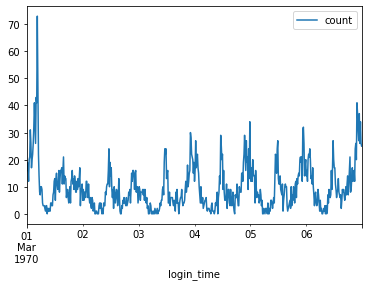

In [44]:
df_15.loc[(df_15.index >= "1970-03-01") & (df_15.index < "1970-03-07")].plot()

In [49]:
df_hour = df_sorted.resample("1H").sum()

In [50]:
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


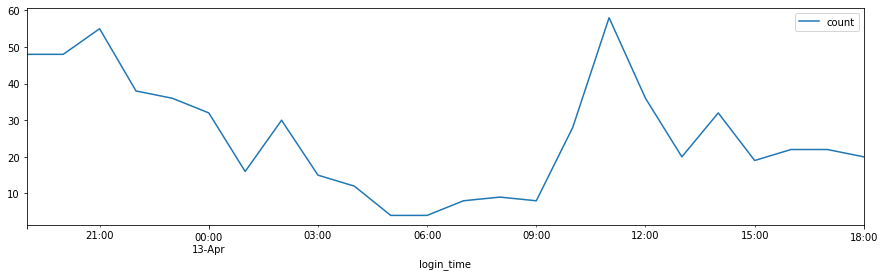

In [69]:
df_hour[-24:].plot(figsize=(15,4))

In [59]:
df_sorted.index.dayofweek

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='login_time', length=92265)

In [60]:
df_sorted.index.hour

Int64Index([20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
            ...
            18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
           dtype='int64', name='login_time', length=92265)

In [61]:
df_sorted["dow"] = df_sorted.index.dayofweek

In [62]:
df_sorted["hour"] = df_sorted.index.hour

In [63]:
df_sorted.head()

,count,dow,hour
login_time,,,
1970-01-01 20:12:16,1,3,20
1970-01-01 20:13:18,1,3,20
1970-01-01 20:16:10,1,3,20
1970-01-01 20:16:36,1,3,20
1970-01-01 20:16:37,1,3,20


In [99]:
df_sorted.index.dayofweek[0]

3

In [72]:
df_dow = df_sorted.groupby(["dow", "hour"]).sum()

In [74]:
df_dow.head()//

count
dow hour       
0   0       531
    1       414
    2       312
    3       236
    4       206

In [93]:
unstacked = df_dow.unstack(level=-1)

In [95]:
unstacked.columns = unstacked.columns.droplevel()

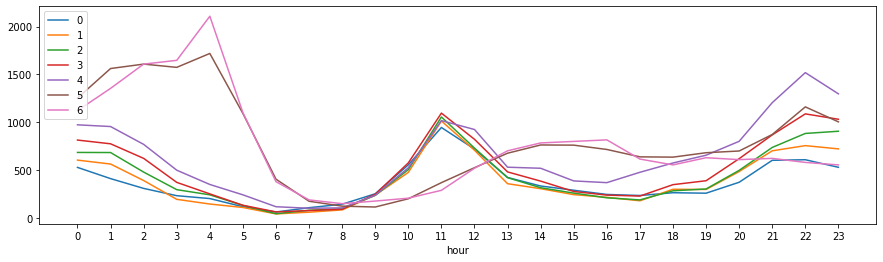

In [101]:
for i in range(len(unstacked.index)):
    unstacked.loc[i].plot(figsize=(15, 4), legend=True, xticks=range(24))

# EDA Conclusions

A strong daily cycle exists in the login data.  During the weekdays(0-4) the data peaks at 11am and again just after 10pm each day with the lowest longins coming at 6am.  The numbers for the days are quite consistent between days for the first spike but have a bit more variation in the night spike.

The weekend(5-6) has dramatically different patterns.  Both days have a spike between 4 and 5am that is higher than any weekday numbers.  The lowest point comes at 8am instead of 6am.  On Saturday there is a similar spike around 10pm.  but sunday logins taper off throughout the evening.  

In general for the weekdays logins seem extremely strong during the user lunch times and then before bed.  Weekends seem to indicate that people are either up late or early to logging in.